**Exercise 1**

Taking the derivative of Equation (5), we get the following: <br>
$x_{uuu} = -\frac{F_{xxx}x_u^3+3F_{xxu}x_u^2+3F_{xx}x_{uu}x_u+3F_{xuu}x_u+3F_{xu}x_{uu}+F_{uuu}}{F_x}$

**Exercise 2**

In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.linalg as la
import matplotlib.pyplot as plt
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve
from LinApp_FindSS import LinApp_FindSS
from sympy.utilities.lambdify import lambdify
import ar1_approx as ar1
import math
%matplotlib inline

In [2]:
alpha = .33
k = 5
z = 1
b = 2
t = .1    
h = 24

#make kgrid
kgrid = np.linspace(1,15,25)

In [3]:
# Define equations

def labor_supply(w, pi, k):
    return h - (b/(w*(1 + b)))*(w*h + pi - t)

def labor_demand(w, k):
    return ((1 - alpha)*z/w)**(1/alpha)*k

def profit(w, nd, k):
    return z*k**alpha*nd**(1 - alpha) - w * nd

def get_w(k1):
    if k1 < 5:
        state_init = 0.3
    else:
        state_init  = 0.8
    args = (alpha, k1, z, b, t, h)
    return opt.fsolve(errors, state_init, args = args)[0]

def errors(state, *args):
    alpha, k, z, b, t, h = args
    nd = labor_demand(state, k)
    pi = profit(state, nd ,k)
    ns = labor_supply(state, pi, k)
    error = nd - ns
    return error

def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

In [4]:
state_init = 0.8
k = 5
args = (alpha, k, z, b, t, h)
w = opt.fsolve(errors, state_init, args = args)[0]
print("Equilibirum Wage at k =", k, ":", w)

Equilibirum Wage at k = 5 : 0.627361779043999


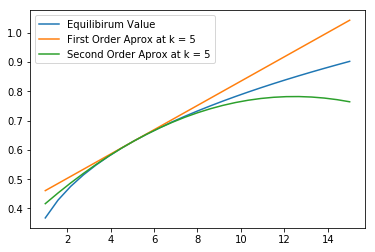

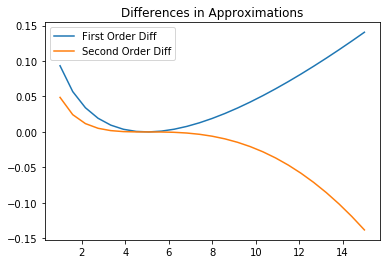

In [5]:
f = lambda x: get_w(x)
weq = np.zeros_like(kgrid)
wfirst = np.zeros_like(kgrid)
wsecond = np.zeros_like(kgrid)

for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,5,kgrid[i])
    wsecond[i] = second_approx(f,5,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 5")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 5")
plt.legend()
plt.show()

diff1 = wfirst - weq
diff2 = wsecond - weq
plt.plot(kgrid, diff1, label  = "First Order Diff")
plt.plot(kgrid, diff2, label  = "Second Order Diff")
plt.title('Differences in Approximations')
plt.legend()
plt.show()

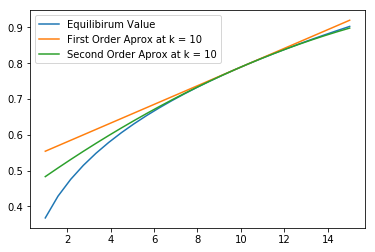

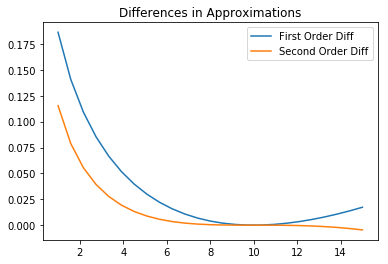

In [6]:
for i in range(len(kgrid)):
    weq[i] = get_w(kgrid[i])
    wfirst[i] = first_approx(f,10,kgrid[i])
    wsecond[i] = second_approx(f,10,kgrid[i])
    
plt.plot(kgrid, weq , label  = "Equilibirum Value")
plt.plot(kgrid, wfirst, label  = "First Order Aprox at k = 10")
plt.plot(kgrid, wsecond, label  = "Second Order Aprox at k = 10")
plt.legend()
plt.show()

diff1 = wfirst - weq
diff2 = wsecond - weq
plt.plot(kgrid, diff1, label  = "First Order Diff")
plt.plot(kgrid, diff2, label  = "Second Order Diff")
plt.title('Differences in Approximations')
plt.legend()
plt.show()

**Exercise 3**

In [7]:
def f(y, *args):
    x, = args
    error = (((x ** 0.35) + 0.9 * x - y) ** (-2.5)) -\
            (0.95 * ((y ** 0.35 + 0.9 * y) ** (-2.5)))
    return error

In [8]:
def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def third_deriv(f, x, h = 1e-2):
    return (f(x + 2*h) - 2 * f(x + h) + 2 * f(x - h) - f(x - 2*h))/(2*(h**3))

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

def third_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2 + \
            1/6* third_deriv(f,x0)*(x - x0) ** 3

In [9]:
x0 = 100
y0 = 49.2166
x = np.linspace(99,101,20)
y = np.repeat(49.,20)

g = lambda x: opt.fsolve(f, y0, args = x)

#actual y
for i in range(len(x)):
    y[i] = g(x[i])
#first order approx
lin = first_approx(g, x0, x)
#second order approx
quad = second_approx(g, x0, x)
#third order approx
cube = third_approx(g, x0, x)

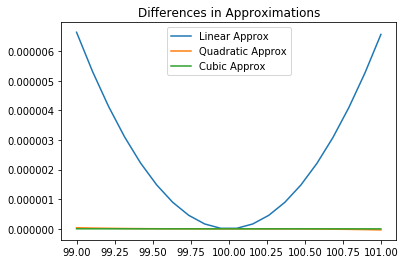

In [10]:
diff1 = lin - y
diff2 = quad - y
diff3 = cube - y
plt.plot(x, diff1, label='Linear Approx')
plt.plot(x, diff2, label='Quadratic Approx')
plt.plot(x, diff3, label='Cubic Approx')
plt.title('Differences in Approximations')
plt.legend()
plt.show()

**Problem 4**

In [17]:
alpha = 0.35
beta = 0.98
kbar = (alpha * beta) ** (1 / (1 - alpha))
kvec = np.full((25), kbar)
weights = np.linspace(0.5, 1.5, 25)
kvec = weights * kbar
rho = 0.9

# Uhlig notation

F = (alpha * beta * kbar ** (alpha - 1)) / ((kbar ** alpha) - kbar)
G = - (beta * alpha * kbar **(alpha - 1) * (alpha + kbar ** (alpha-1))) / (kbar**alpha - kbar)
H = (beta * alpha ** 2 * kbar ** (2 * (alpha - 1))) / (kbar ** alpha - kbar)
L = - (alpha * beta * kbar**alpha) / (kbar ** alpha - kbar)
M = (alpha * beta * kbar ** (2 * alpha - 1)) / (kbar ** alpha - kbar)

P1 = (-G + np.sqrt(G **2 - 4 * F * H)) / (2 * F)
P2 = (-G - np.sqrt(G **2 - 4 * F * H)) / (2 * F)

if la.norm(P1) < 1:
    Hx = P1
else:
    Hx = P2

N = rho

QQ = - (L * N + M) / (F * N + F * Hx + G)

print("Hx = ", Hx)

Hx =  0.3499999999999999


In [12]:
#Hxx

def Fy(kbar):
    return (alpha * beta * kbar ** (alpha - 1)) / ((kbar ** alpha) - kbar)

def Fx(kbar):
    return - (beta * alpha * kbar **(alpha - 1) * (alpha + kbar ** (alpha-1))) / (kbar**alpha - kbar)

def Fuu(u):
    a = alpha
    numerator = (a - 1) * a ** 2 * beta * u ** (2*a-3)
    denominator = (u ** a - u)
    return numerator / denominator

def Fyy(u):
    a = alpha
    numerator = 2*a*beta*u**(a-1)
    denom = (u**alpha - u)**2
    return numerator / denom

def Fyx(u):
    a = alpha
    num = a*beta*(u**(a-2))*((-1-a)*u**(2*a)+u**(a+1)+a*u**2)
    denom = (u**a-u)**3
    return num / denom

def Fyu(u):
    a = alpha
    num = alpha**2*beta*u**(2*(a-1))
    denom = (u**a-u)**2
    return num / denom

def Fxx(u):
    a = alpha
    num = a*beta*u**(a-3)*((2*u**(3*a))+(a**2+3*a-4)*u**(2*a+1)+\
               (a**2-3*a+2)*u**(2+a) - a*(a+1)*u**(a+2) - (a-1)*a*u**3)
    denom = (u**a-u)**3
    return num/denom

def Fxu(u):
    a = alpha
    num = - a**2*beta*u**(2*a-3)*(u**a+(a-1)*u)
    denom = (u**a-u)**2
    return num / denom

def xu(u):
    return Hx

def xuu(u):
    numerator = (Fyy(u)*xu(u)**4 + 2*Fyx(u)*xu(u)**3 + 2*Fyu(u)*xu(u)**2 +\
                 Fxx(u)*xu(u)**2 + 2*Fxu(u)*xu(u) + Fuu(u))
    denominator = (Fy(u)*xu(u)**2 + Fy(u)*xu(u) + Fx(u))

    return - numerator / denominator

Hxx = xuu(kbar)

print(Fyy(kbar))
print(Fyx(kbar))
print(Fyu(kbar))
print(Fxx(kbar))
print(Fxu(kbar))
print(Fuu(kbar))
print("Hxx = ", Hxx)


14.667352944392718
-31.431111072747104
7.4833433389758754
105.30926981616871
-16.95315434854578
-9.317089716937744
Hxx =  -1.180085635564805


In [13]:
optK_linear = np.zeros((25))
optK_cfs = np.zeros((25))
optK_quad = np.zeros((25))

for i in range (0, len(kvec)):
    optK_quad[i] = kbar + Hx * (kvec[i] - kbar) + Hxx * (kvec[i] - kbar)**2
    optK_linear[i] = kbar + Hx * (kvec[i] - kbar) 
    optK_cfs[i] = alpha * beta * kvec[i] ** alpha

**Exercise 5**

<IPython.core.display.Javascript object>


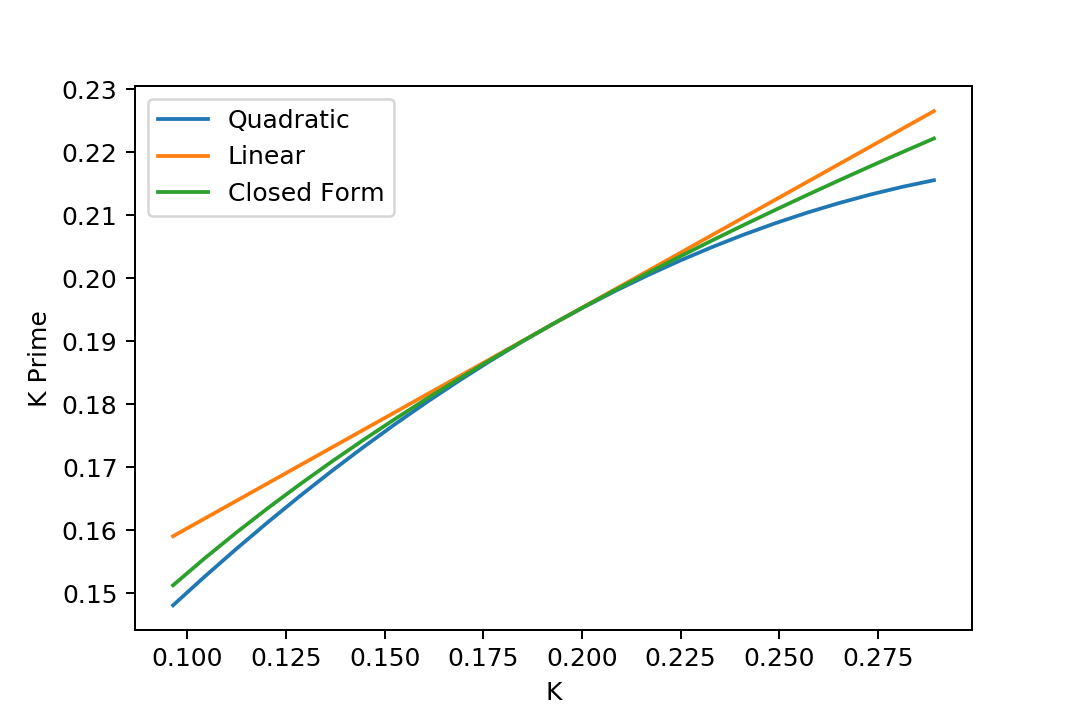

In [15]:
#Plot

import matplotlib

%matplotlib notebook

plt.plot(kvec, optK_quad, label = 'Quadratic')
plt.plot(kvec, optK_linear, label = 'Linear')
plt.plot(kvec, optK_cfs, label = 'Closed Form')
plt.xlabel('K')
plt.ylabel('K Prime')
plt.legend()
plt.show()

In [18]:
import sympy as sy
from sympy import diff
from sympy import lambdify

alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02
Hz = QQ
Hv = 0
kbar = (alpha * beta) ** (1 / (1 - alpha))

params = np.array([Hx, Hz, Hv, N])

x2, x1, x0, z1, z0 = sy.symbols('x2 x1 x0 z1 z0')
nx = 1
nz = 1
ns = nx + nz + 1

F = (alpha * beta * kbar ** (alpha - 1)) / ((kbar ** alpha) - kbar)
GG = - (beta * alpha * kbar **(alpha - 1) * (alpha + kbar ** (alpha-1))) / (kbar**alpha - kbar)
H = (beta * alpha ** 2 * kbar ** (2 * (alpha - 1))) / (kbar ** alpha - kbar)
L = - (alpha * beta * kbar**alpha) / (kbar ** alpha - kbar)
M = (alpha * beta * kbar ** (2 * alpha - 1)) / (kbar ** alpha - kbar)

P1 = (-GG + math.sqrt(GG **2 - 4 * F * H)) / (2 * F)
P2 = (-GG - math.sqrt(GG **2 - 4 * F * H)) / (2 * F)

if la.norm(P1) < 1:
    Hx = P1
else:
    Hx = P2

N = rho

QQ = - (L * N + M) / (F * N + F * Hx + GG)

G = lambda x2, x1, x0, z1, z0: (alpha*beta*sy.exp(z1)*(x1**(alpha-1))*(sy.exp(z0)*x0**alpha-x1)/
                                (sy.exp(z1)*x1**alpha-x2))

Fx2x2 = diff(G(x2, x1, x0, z1, z0),x2,x2)
Fx2x1 = diff(G(x2, x1, x0, z1, z0),x2,x1)
Fx2x0 = diff(G(x2, x1, x0, z1, z0),x2,x0)
Fx2z1 = diff(G(x2, x1, x0, z1, z0),x2,z1)
Fx2z0 = diff(G(x2, x1, x0, z1, z0),x2,z0)

Fx1x1 = diff(G(x2, x1, x0, z1, z0),x1,x1)
Fx1x0 = diff(G(x2, x1, x0, z1, z0),x1,x0)
Fx1z1 = diff(G(x2, x1, x0, z1, z0),x1,z1)
Fx1z0 = diff(G(x2, x1, x0, z1, z0),x1,z0)

Fx0x0 = diff(G(x2, x1, x0, z1, z0),x0,x0)
Fx0z1 = diff(G(x2, x1, x0, z1, z0),x0,z1)
Fx0z0 = diff(G(x2, x1, x0, z1, z0),x0,z0) 

Fz1z1 = diff(G(x2, x1, x0, z1, z0),z1,z1)
Fz1z0 = diff(G(x2, x1, x0, z1, z0),z1,z1)

Fz0z0 = diff(G(x2, x1, x0, z1, z0),z0,z0)

Fx2x2 = lambdify((x2, x1, x0, z1, z0),Fx2x2,'numpy')
Fx2x1 = lambdify((x2, x1, x0, z1, z0),Fx2x1,'numpy')
Fx2x0 = lambdify((x2, x1, x0, z1, z0),Fx2x0,'numpy')
Fx2z1 = lambdify((x2, x1, x0, z1, z0),Fx2z1,'numpy')
Fx2z0 = lambdify((x2, x1, x0, z1, z0),Fx2z0,'numpy')

Fx1x1 = lambdify((x2, x1, x0, z1, z0),Fx1x1,'numpy')
Fx1x0 = lambdify((x2, x1, x0, z1, z0),Fx1x0,'numpy')
Fx1z1 = lambdify((x2, x1, x0, z1, z0),Fx1z0,'numpy')
Fx1z0 = lambdify((x2, x1, x0, z1, z0),Fx1z0,'numpy')

Fx0x0 = lambdify((x2, x1, x0, z1, z0),Fx0x0,'numpy')
Fx0z1 = lambdify((x2, x1, x0, z1, z0),Fx0z1,'numpy')
Fx0z0 = lambdify((x2, x1, x0, z1, z0),Fx0z0,'numpy')

Fz1z1 = lambdify((x2, x1, x0, z1, z0),Fz1z1,'numpy')
Fz1z0 = lambdify((x2, x1, x0, z1, z0),Fz1z0,'numpy')

Fz0z0 = lambdify((x2, x1, x0, z1, z0),Fz0z0,'numpy')

Fx2x2 = Fx2x2(kbar,kbar,kbar,0,0)
Fx2x1 = Fx2x1(kbar,kbar,kbar,0,0)
Fx2x0 = Fx2x0(kbar,kbar,kbar,0,0)
Fx2z1 = Fx2z1(kbar,kbar,kbar,0,0)
Fx2z0 = Fx2z0(kbar,kbar,kbar,0,0)

Fx1x1 = Fx1x1(kbar,kbar,kbar,0,0)
Fx1x0 = Fx1x0(kbar,kbar,kbar,0,0)
Fx1z1 = Fx1z1(kbar,kbar,kbar,0,0)
Fx1z0 = Fx1z0(kbar,kbar,kbar,0,0)

Fx0x0 = Fx0x0(kbar,kbar,kbar,0,0)
Fx0z1 = Fx0z1(kbar,kbar,kbar,0,0)
Fx0z0 = Fx0z0(kbar,kbar,kbar,0,0)

Fz1z1 = Fz1z1(kbar,kbar,kbar,0,0)
Fz1z0 = Fz1z0(kbar,kbar,kbar,0,0)

Fz0z0 = Fz0z0(kbar,kbar,kbar,0,0)

GAA = np.array([[Fx2x2, Fx2x1, Fx2x0, Fx2z1, Fx2z0],\
                [Fx2x1, Fx1x1, Fx1x0, Fx1z1, Fx1z0],\
               [Fx2x0, Fx1x0, Fx0x0, Fx0z1, Fx0z0], \
                [Fx2z1, Fx1z1, Fx0z1, Fz1z1, Fz1z0],\
               [Fx2z0, Fx1z0, Fx0z0, Fz1z0, Fz0z0]])

GA = np.array([F, GG, H, L, M]) 

def EFs(params):
    
    Hx, Hz, Hv, N = params 
    
    values = np.array([[Hx*Hx, Hx*Hz+Hz*N, Hx*Hv+Hv], [Hx, Hz, Hv], [1, 0, 0], [0, N, 0], [0, 1, 0]])
    
    return values

EL = np.kron(EFs(params),np.eye(nx)).T @ GAA @ EFs(params)


EL[2,2] = 0

def EFss(inputs, params):
    Hxx, Hxz, Hzz, Hvv = inputs
    Hx, Hz, N, Hv, EL, GA, ns = params
    values = np.array([[Hxx*Hx*Hx+Hx*Hxx, Hxx*Hx*Hz+Hx*Hxz+Hxz*Hx*N, Hxx*Hx*Hv],\
                      [Hxx, Hxz, 0.],\
                      [0.,0.,0.],\
                      [0.,0.,0.],\
                      [0.,0.,0.],\
                      [Hxx*Hx*Hz+Hx*Hxz+Hxz*Hx*N, Hxz*N*Hz+Hx*Hzz+Hzz*N*N, Hxz*N*Hv],\
                      [Hxz, Hzz, 0.],\
                      [0., 0., 0.],\
                      [0.,0.,0.],\
                      [0.,0.,0.],\
                      [Hxx*Hx*Hv, Hxz*N*Hv, Hx*Hvv+Hvv],\
                      [0.,0.,Hvv],\
                      [0.,0.,0.],\
                      [0.,0.,0.],\
                      [0.,0.,0.]])
    return values

In [24]:
from scipy import optimize as opt

def DSS(inputs, params):
    
    Hxx, Hxz, Hzz, Hvv = inputs
    Hx, Hz, N, Hv, EL, GA, ns = params
    DSS = EL + np.kron(np.eye(ns),GA) @ EFss(inputs,params)

    return DSS.flatten()

init_vec = np.array([1,1,1,1])
parameters = [Hx, Hz, N, Hv, EL, GA, ns]
results = opt.root(DSS, init_vec, args = parameters, method = 'lm')

# Scalar values of Hx, Hz, Hxx, Hxz, Hzz, Hvv

Hxx, Hxz, Hzz, Hvv = results.x
print(Hx, Hz)
print(results.x)

0.3499999999999999 0.19278261945042244
[-1.18008564e+00 -3.41019087e-01 -2.33307014e-01 -8.03546784e-25]


In [20]:
matrix = np.array([[Hxx, Hxz, 0], [Hxz, Hzz, 0], [0,0, Hvv]])

In [21]:
# Plot policy funciton
# K grid
k_lb = 0.5 * kbar
k_ub = 1.5 * kbar
kgrid = np.linspace(k_lb, k_ub, 25)
sizek = len(kgrid)

# z grid
step = 10 * sigma/25
pi, zgrid = ar1.rouwen(rho, 0, step, 25)
sizez = len(zgrid)

optk = np.zeros((sizek, sizez))
for i in range(sizek):
    optk[i,:] = Hx * (kgrid[i] - kbar) + Hz * (zgrid - 0) + (1/2) * (Hxx * (kgrid[i] - kbar) ** 2\
                                                                          + Hzz * (zgrid[i] - z) ** 2\
                                                                          +2 * Hxz * (kgrid[i] - kbar) * (zgrid[i] - z)) + kbar

<IPython.core.display.Javascript object>


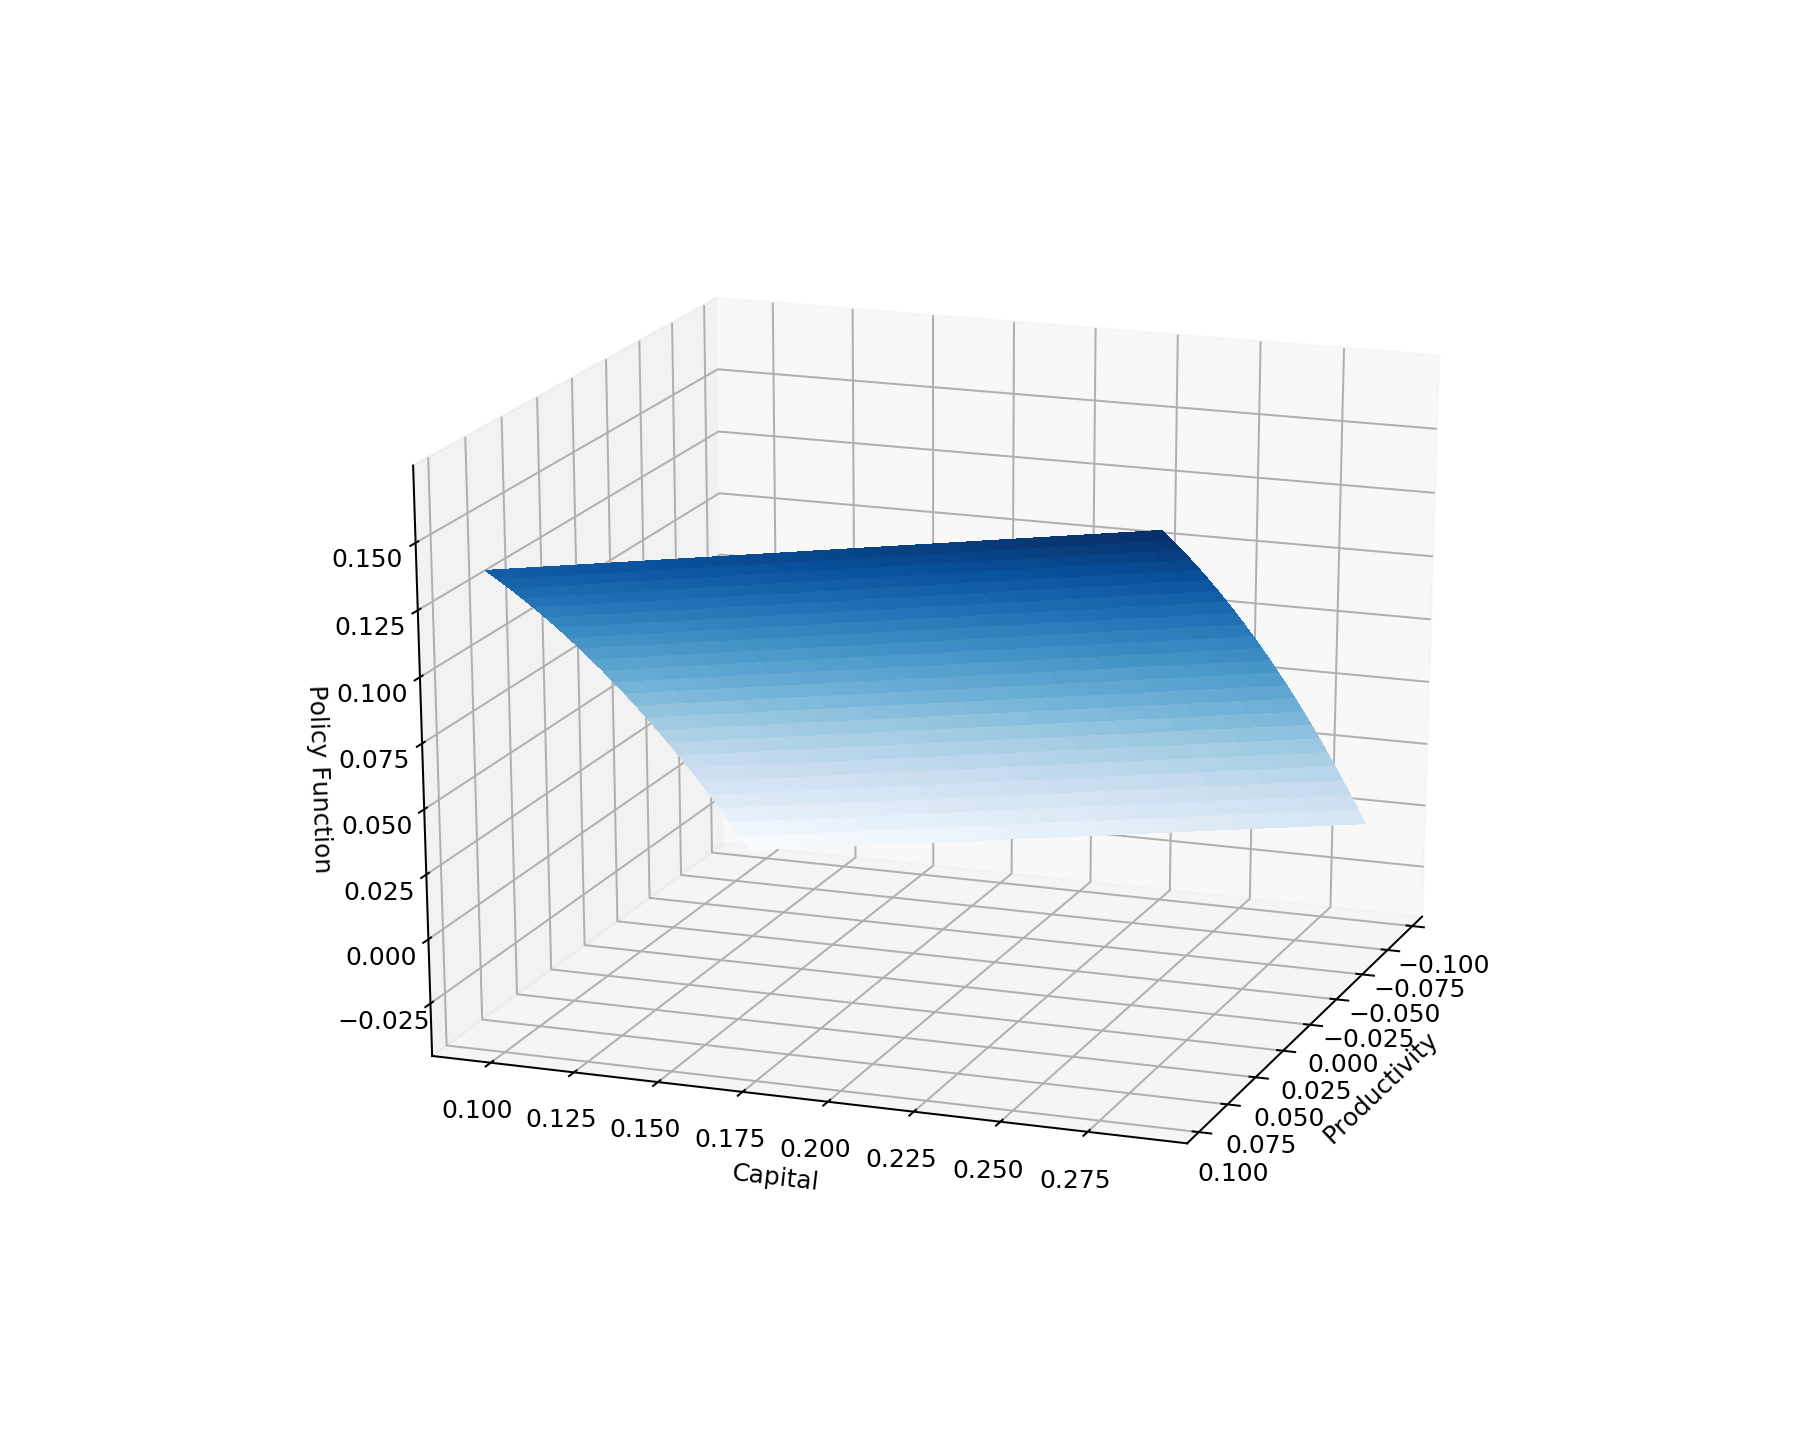

Text(0.5,0,'Policy Function')

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook
fig = plt.figure(figsize=(10, 8))
zmat, kmat = np.meshgrid(kgrid, zgrid)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, optk, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Productivity')
ax.set_ylabel(r'Capital')
ax.set_zlabel(r'Policy Function')